## Correlation Analysis between the 'news sentiment' and 'stock movement'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
class CorelationAnalysis:
    def __init__(self,sentiment_data,closing_data):
        self.sentiment_data = pd.read_csv(sentiment_data,index_col='date', parse_dates=True)
        self.closing_data = pd.read_csv(closing_data,index_col='Date', parse_dates=True)
    def preprocess_data(self):
         #let's localize the data
        self.sentiment_data.index = self.sentiment_data.index.tz_localize(None)
        #self.sentiment_data.index = self.sentiment_data.index.tz_localize('nonlocal')
        #self.sentiment_data.tz_localize = self.sentiment_data.tz_localize('local')
        self.closing_data.index = self.closing_data.index.tz_localize('nonlocal')
        self.merged_data = pd.merge(self.closing_data, self.sentiment_data, left_index=True, right_index=True)
        return self.merged_data
        #print(self.sentiment_data.index)
        #print(type(self.sentiment_data.index))
    ################
    #def preprocess_data(self):
        # Ensure the index is a datetime index
       #if not pd.api.types.is_datetime64_any_dtype(self.sentiment_data.index):
        #self.sentiment_data.index = pd.to_datetime(self.sentiment_data.index)

    # Localize the data
       ## self.sentiment_data.index = self.sentiment_data.index.tz_localize('UTC')  # Change 'UTC' to your desired timezone
       #self.sentiment_data.index = self.sentiment_data.index.tz_localize(None)
       #self.closing_data.index = self.closing_data.index.tz_localize(None)

    # Merge data
      # self.merged_data = pd.merge(self.closing_data, self.sentiment_data, left_index=True, right_index=True)
    
    ########
    
    def check_the_merged_data(self):
        self.mereged_data = self.preprocess_data()
        return self.mereged_data
    def clean_data(self):
        data =self.check_the_merged_data()
        self.cleaned_data = data[['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA', 'nltk_sentiment_label']]
        return self.cleaned_data
    def corelate(self,company):
        # Calculate the correlation matrix
       # Calculate the correlation between sentiment and daily returns for the specific company
        complete_data = self.clean_data()
        complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()
        
        # Calculate the correlation value
        correlation_returns = complete_data['nltk_sentiment_label'].corr(complete_data[f'{company} Daily Returns'])
        print(f"Correlation between sentiment and daily stock returns of {company}:", correlation_returns)
        
        correlation_closing = complete_data['nltk_sentiment_label'].corr(complete_data[company])
        print(f"Correlation between sentiment and closing price of {company}:", correlation_closing)
        
        # Plot the correlations as a bar plot
        plt.figure(figsize=(8, 6))
        plt.bar(['Daily Returns', 'Closing Price'], [correlation_returns, correlation_closing], color=['blue', 'orange'])
        plt.xlabel('Metrics')
        plt.ylabel('Correlation')
        plt.title(f'Correlation between Sentiment and Stock Metrics for {company}')
        plt.ylim(-1, 1)  # Set y-axis limits to show the correlation range
        for index, value in enumerate([correlation_returns, correlation_closing]):
            plt.text(index, value, f'{value:.3f}', ha='center', va='bottom')
        plt.show()
    
    

        # vps ubuntu installed 

In [4]:
sentiment_data = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\raw_analyst_ratings.csv\raw_analyst_ratings.csv'
closing_data = r'E:\KAIM 2\KAIM 2 Week 1\challenge\Kifiya AI Mastery 2\Week1\data\TA-lib_data-yfinance\closing_for_the_seven_data_together.csv'
corelation_analysis = CorelationAnalysis(sentiment_data,closing_data)

In [ ]:
corelation_analysis.check_the_merged_data().head()

In [ ]:
#Check the Index Type: First, ensure that the index of self.sentiment_data is a datetime index.
print(self.sentiment_data.index)
print(type(self.sentiment_data.index))

In [ ]:
corelation_analysis.clean_data()

In [ ]:
corelation_analysis.corelate('AAPL')
corelation_analysis.corelate('AMZN')
corelation_analysis.corelate('GOOGL')
corelation_analysis.corelate('META')
corelation_analysis.corelate('MSFT')
corelation_analysis.corelate('NVDA')
corelation_analysis.corelate('TSLA')

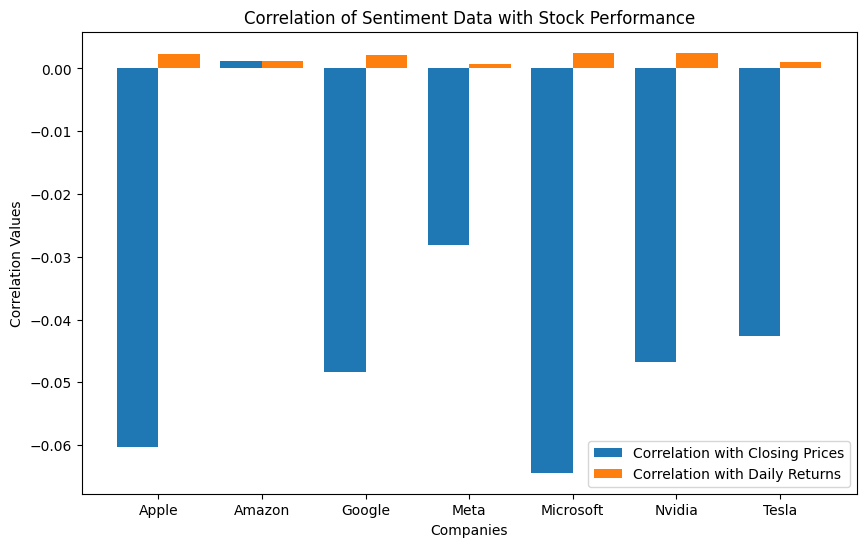

In [143]:

# Data
companies = ['Apple', 'Amazon', 'Google', 'Meta', 'Microsoft', 'Nvidia', 'Tesla']
closing_prices_corr = [-0.0603, 0.0012, -0.0483, -0.0281, -0.0644, -0.0468, -0.0426]
daily_returns_corr = [0.0023, 0.0012, 0.0022, 0.0007, 0.0025, 0.0025, 0.0010]

# Create a grouped bar chart
x = range(len(companies))

plt.figure(figsize=(10, 6))

plt.bar(x, closing_prices_corr, width=0.4, label='Correlation with Closing Prices', align='center')
plt.bar([p + 0.4 for p in x], daily_returns_corr, width=0.4, label='Correlation with Daily Returns', align='center')

# Labels and Title
plt.xlabel('Companies')
plt.ylabel('Correlation Values')
plt.title('Correlation of Sentiment Data with Stock Performance')
plt.xticks([p + 0.2 for p in x], companies)
plt.legend()

# Show the plot
plt.show()
